<a href="https://colab.research.google.com/github/Parth-Kakdiya-13/TensorFlow/blob/main/Regression_with_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.19.0


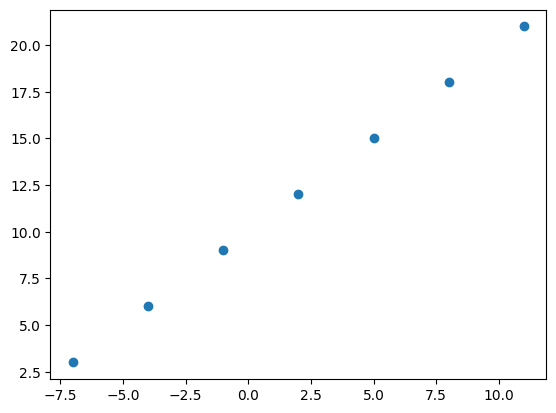

In [3]:
# Create Data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# crate features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0])
# create labels
Y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0])
# visualize
plt.scatter(X,Y)

In [4]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True])

In [5]:
# Input and output shape
# creating a demo for our housing price prediction
house_info = tf.constant(["bathroom,bathroom,garage"])
house_price = tf.constant([9322222])
house_info,house_price

(<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'bathroom,bathroom,garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([9322222], dtype=int32)>)

In [6]:
# convert array to tensors and change dtype with float 32
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X,Y

(<tf.Tensor: shape=(7,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11.], dtype=float32)>,
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21.], dtype=float32)>)

In [7]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

***Steps in modelling with Tensorflow***


---


**=> Creating a model** - define the input and outout kayers, as well as the hidden layers of a deep learning model.

**=> Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optmizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the preference of our model).

**=> Fitting a model** - letting the model try to finding patterns between X & Y (features and labels).


---



In [8]:
# set random seeds
tf.random.set_seed(42)
# create a model with sequencial API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# fit the model
# Reshape X to be (number_of_samples, number_of_features)
# model.fit(X,Y,epochs=5) # this is not work
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)

weights, bias = model.layers[0].get_weights()
print("Learned weight (slope):", weights[0][0])
print("Learned bias (intercept):", bias[0])


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step - loss: 9.0882 - mae: 9.0882
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 9.0382 - mae: 9.0382
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.9882 - mae: 8.9882
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 8.9382 - mae: 8.9382
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 8.8882 - mae: 8.8882
Learned weight (slope): 1.5558754
Learned bias (intercept): 0.049999997


In [9]:
# checkout X and Y
X,Y

(<tf.Tensor: shape=(7,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11.], dtype=float32)>,
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21.], dtype=float32)>)

In [10]:
# try and make predection
y_pred = model.predict(tf.expand_dims([17.0], axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[26.499882]], dtype=float32)

In [11]:
y_pred + 10

array([[36.49988]], dtype=float32)

**Improving our model**
---
we can improve our model, by altering the steps we took to create a model

1. **create a model** - Here we might add more layers, increase number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layers
2. **compiling a model** - here we might change optimization function or perhaps the **lerning rate** of optimization function
3. **fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


In [12]:
# lets rebuild our model

# 1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - loss: 9.7508 - mae: 9.7508
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 9.7008 - mae: 9.7008
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.6508 - mae: 9.6508
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.6008 - mae: 9.6008
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.5508 - mae: 9.5508
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 9.5008 - mae: 9.5008
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 9.4508 - mae: 9.4508
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 9.4008 - mae: 9.4008
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 9.3508 - mae: 9.3508
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.3008 - mae: 9.3008
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.2508 - mae: 9.2508
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.2008 - mae: 9.2008
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/s

In [13]:
# Let's see if our model prediction improved
model.predict(tf.expand_dims([17.0],axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[32.095688]], dtype=float32)

**- change the learning rate (this is important hyper parameter of many different known networks)**

In [14]:
# let's see if we can make another changes to improve our model

# 1. create the model (this time add extra hidden layer with 100 hidden unites)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

# 2 compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

# 3 fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)
# model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.8190 - mae: 11.8190   
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.3626 - mae: 11.3626
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 10.9006 - mae: 10.9006
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 10.4309 - mae: 10.4309
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 9.9517 - mae: 9.9517
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.4617 - mae: 9.4617
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.9599 - mae: 8.9599
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.4448 - mae: 8.4448
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.9150 - mae: 7.9150
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.3689 - mae: 7.3689
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 7.4718 - mae: 7.4718
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.7976 - mae: 7.7976
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [15]:
# let's remid ourselves of data
X,Y

(<tf.Tensor: shape=(7,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11.], dtype=float32)>,
 <tf.Tensor: shape=(7,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21.], dtype=float32)>)

In [16]:
# let's predict
model.predict(tf.expand_dims([17.0], axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[27.175491]], dtype=float32)

**Evaluating a model**

In practice, a typcal workflow you will go through when building neural network is:

Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...

# when it comes to evaluation... there are 3 words you should memorize:
# "vizualize","vizualize""vizualize"
Its good idea to vizualize:
* The data - what data we are working with? what does it looks like?
* The model itself - what does our model looks like?
* The training of a model - how does a model perform while it learns?
* The prediction of the model - how do the prediction of a model line up against the group truth(the original labels)?

In [17]:
# make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [18]:
# make labels for dataset
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

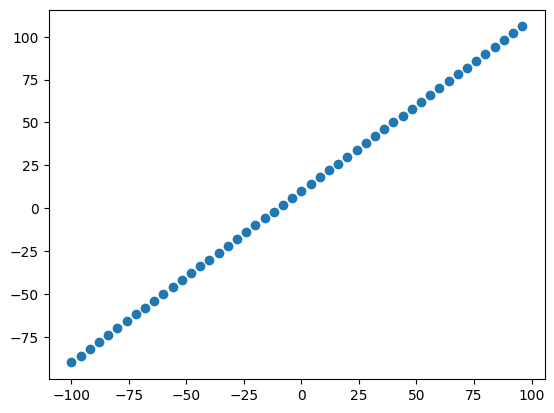

In [19]:
# vizulize the data
import matplotlib.pyplot as plt
plt.scatter(X,Y)

### The 3 sets...

* **Training set** - the model learn from this data, which is typically 70-80% of the total data you hava available.
* **validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **test data** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [20]:
len(X)


50

In [21]:
X_train = X[:40] #first 40 are training samples (80% of data)
Y_train = Y[:40]
# X_val = X[40:80]
# Y_val = Y[40:80]
X_test = X[40:] #last 10 are testing samples (20% of data)
Y_test = Y[40:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

Visualizing data

Now we have got our data in training and test sets... let's visulize it again!

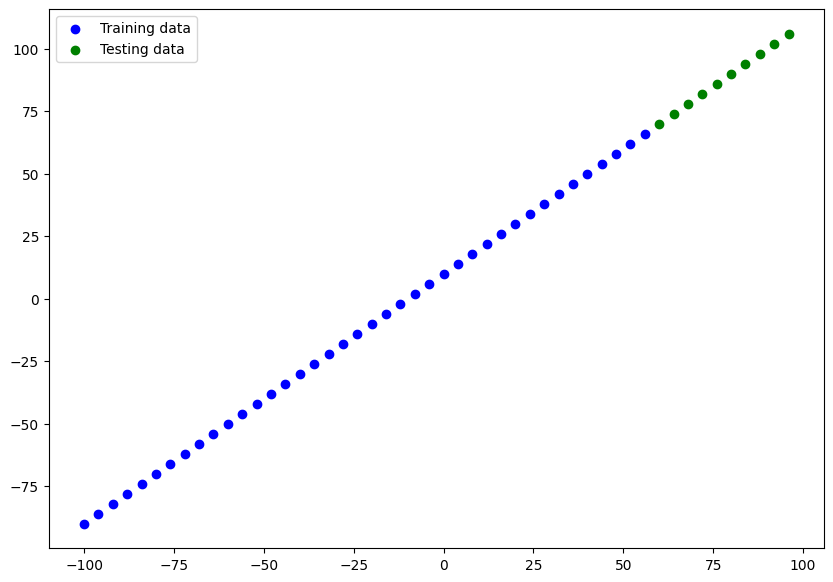

In [22]:
plt.figure(figsize=(10,7))
# plot training data in blue
plt.scatter(X_train, Y_train, c="b", label="Training data") # our model will learn on training data
# plot test data in green
plt.scatter(X_test, Y_test, c="g", label="Testing data") # want our model to be able to predict this (given x, what's the y?)
# show legend
plt.legend();

In [23]:
# Let's have a look at how to build a neural network for our data

# 1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
# model.fit(tf.expand_dims(X_train,axis=-1),Y_train, epochs=100)

###Vizulizing the model

In [24]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
X_train.shape,Y_train.shape
X_train[0],Y_train[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [68]:
# let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. create a model(same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, input_shape=[1], name="input_layer_01"),
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer_02"),
    tf.keras.layers.Dense(5, input_shape=[1], name="input_layer_03"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. compile the model(same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])



In [51]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_01 (Dense)          │ (None, 15)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input_layer_02 (Dense)          │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input_layer_03 (Dense)          │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251 (1004.00 B)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model
* Trainable params - these are the parameters (patterns) the model can update as it trains.
* non-trainable params - these paremeters are not update during training (this is typically when you bring in already learn patterns or parameters from other models during **transfer learning**).


In [52]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100, verbose=0)

In [53]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_01 (Dense)          │ (None, 15)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input_layer_02 (Dense)          │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input_layer_03 (Dense)          │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 253 (1016.00 B)

 Trainable params: 251 (1004.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

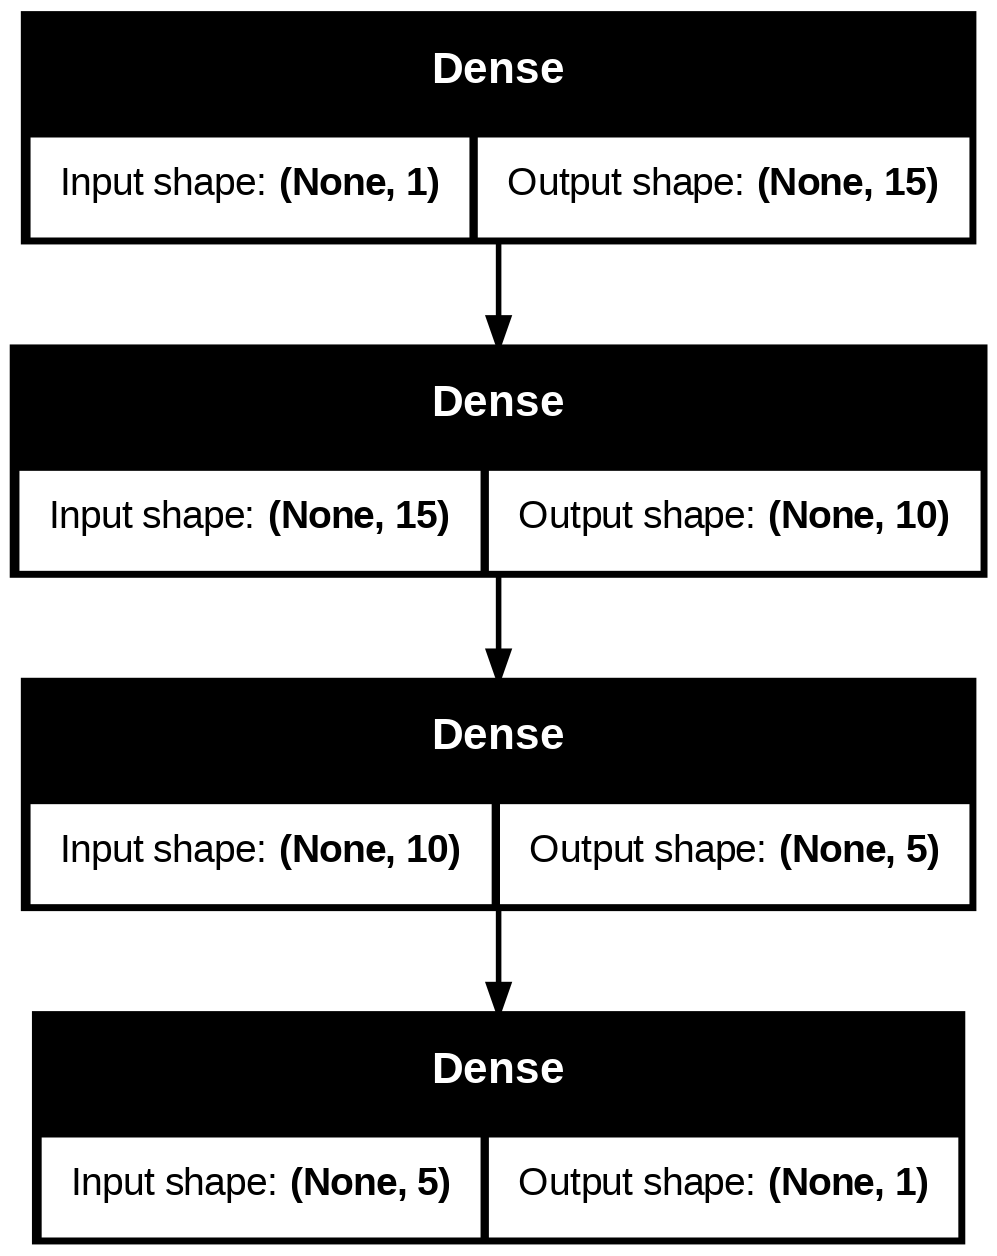

In [54]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Vizuliaing our model's predictions

To vizulize prediction's it's good idea to plot them against the ground truth labels.
Ofter you will see in the form of `Y_test` or `Y_true` v/s `Y_pred` (ground truth v/s your model's predictions).

In [65]:
# Make some predictions
Y_pred = model.predict(tf.expand_dims(X_test, axis=-1))
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[5.2880816],
       [5.640619 ],
       [5.9931564],
       [6.3456984],
       [6.6982327],
       [7.0507765],
       [7.4033175],
       [7.755859 ],
       [8.108396 ],
       [8.460929 ]], dtype=float32)

In [31]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**NOTE** : If you are feel like you are going to reuse some functionality in future, it's good idea to turn into a function.

In [66]:
# Let's create a plotting function

def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=Y_pred):
  """
  Plots training data, test data and compare predictions to the ground truth labels.
  """

  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # plot model's prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # show the legend
  plt.legend();

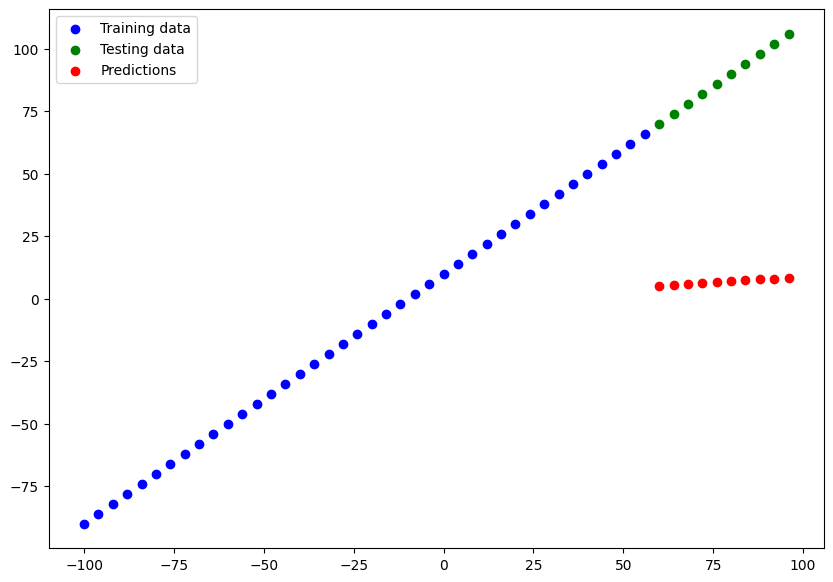

In [67]:
plot_predictions()

### Evaluate our model's prediction with regression  evaluation matrics

Depending on the prblem you are working on there will be different evaluation metrics to evaluate your model's performance

Sice we are working on a regression, two of the main matrics:

* MAE - mean absolute error, "on average, how wrong is each of my model's predictions."

* MSE - mean square error - "square the average errors"